# Figure 5: Differential tolerance is observed in mutational scanning and population genetics data

In [23]:
import os
import paths
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import gprofiler
from Bio import SeqUtils

## Figure A

### View wildtype 6SOW structure: https://esmatlas.com/resources/fold/result?fasta_header=%3Eunnamed&sequence=KEQQNAFYEILHLPNLTEEQRNGFIQSLKDDPSVSKEILAEAKKLNDAQA

### View delG23 6SOW structure: https://esmatlas.com/resources/fold/result?fasta_header=%3Eunnamed&sequence=KEQQNAFYEILHLPNLTEEQRNFIQSLKDDPSVSKEILAEAKKLNDAQA

## Figure B

### ESMFold can be called from the command line via https://gist.github.com/JinyuanSun/4fd8bb4b64cca5da5621724122f4fcab

In [2]:
plddt = pd.read_csv("../data/tsuboyama_esmfold_plddt.csv")

### Plot data

In [3]:
num_structs = {x: plddt.mutation_type.value_counts()[x] for x in plddt.mutation_type.unique()} 

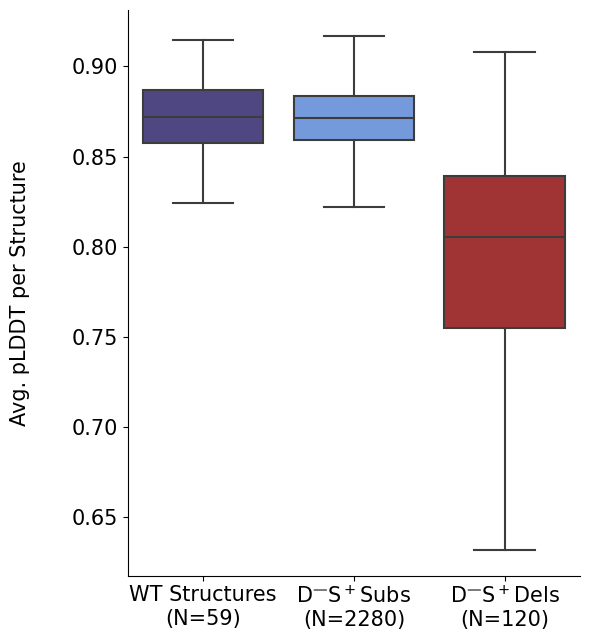

In [4]:
plt.figure(figsize=(6, 6.5))
ax = sns.boxplot(x="mutation_type", y="pLDDT", data=plddt[["mutation_type", "pLDDT"]],
                 palette={"wt": "darkslateblue", "sub": "cornflowerblue", "del": "firebrick"}, showfliers=False)
ax.set(xlabel='')
plt.gca().spines[["top", "right"]].set_visible(False)
plt.ylabel("Avg. pLDDT per Structure", size=15, labelpad=30)
plt.xticks([0, 1, 2], [f"WT Structures\n(N={num_structs['wt']})",
                       r'D$^—$S$^+$' + f"Subs\n(N={num_structs['sub']})",
                       r'D$^—$S$^+$' + f"Dels\n(N={num_structs['del']})"], size=15)
plt.gca().spines[["top", "right"]].set_visible(False)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

## Figure C

### Load in supplementary gnomAD data (already internally processed)

In [18]:
gnomad = pd.read_csv("../data/gnomad_del_sub_merge_AF.csv.gz")

### Plot data

/home/grant/anaconda3/envs/diff-tol/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


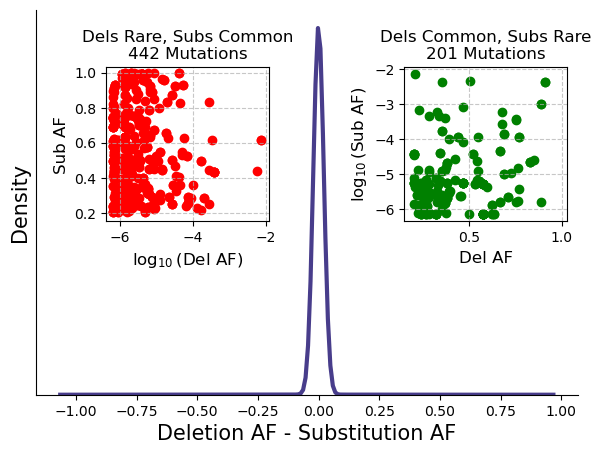

In [24]:
AF_subs = gnomad.AF_subs
AF_dels = gnomad.AF_dels 

# Compute the differences
diffs = gnomad.AF_dels - gnomad.AF_subs

# Define a threshold for highlighting
del_rare_sub_common = gnomad[(gnomad.AF_subs > 0.2) & (gnomad.AF_dels < 0.01)]
del_common_sub_rare = gnomad[(gnomad.AF_subs < 0.01) & (gnomad.AF_dels > 0.2)]

# Plotting
fig, ax = plt.subplots(figsize=(7, 5))

# KDE plot
sns.kdeplot(diffs, ax=ax, color="darkslateblue", linewidth=3, bw_adjust=10)
ax.spines[["top", "right"]].set_visible(False)
ax.set_yticks([])
ax.set_xlabel("Deletion AF - Substitution AF", size=15)
ax.set_ylabel("Density", size=15)
# ax.set_xlim(-0.2, 0.2)

# Inset scatter plot
ax_inset1 = inset_axes(ax, width="30%", height="40%", bbox_to_anchor=(-.02, -.15, 1, 1), bbox_transform=ax.transAxes, borderpad=0)

# Scatter plot of AF_subs vs. AF_dels for substantial differences
ax_inset1.scatter(del_common_sub_rare.AF_dels, np.log10(del_common_sub_rare.AF_subs), color="green")
ax_inset1.set_xlabel("Del AF", fontsize=12)
ax_inset1.set_ylabel(r'$\log_{10}$(Sub AF)', fontsize=12)
ax_inset1.set_title(f"Dels Common, Subs Rare\n{del_common_sub_rare.shape[0]} Mutations", fontsize=12)
ax_inset1.grid(True, linestyle='--', alpha=0.7)

# Ensure the inset plot has proper limits
ax_inset1.set_xlim(0.15, 1.03)

# Inset scatter plot
ax_inset2 = inset_axes(ax, width="30%", height="40%", bbox_to_anchor=(-0.57, -.15, 1, 1), bbox_transform=ax.transAxes, borderpad=0)

# Scatter plot of AF_subs vs. AF_dels for substantial differences
ax_inset2.scatter(np.log10(del_rare_sub_common.AF_dels), del_rare_sub_common.AF_subs, color="red")
ax_inset2.set_xlabel(r'$\log_{10}$(Del AF)', fontsize=12)
ax_inset2.set_ylabel("Sub AF", fontsize=12)
ax_inset2.set_title(f"Dels Rare, Subs Common\n{del_rare_sub_common.shape[0]} Mutations" , fontsize=12)
ax_inset2.grid(True, linestyle='--', alpha=0.7)

# Ensure the inset plot has proper limits
ax_inset2.set_ylim(0.15, 1.03)
plt.show()

## Figure D

### To view deletion and substitution effects within the TBP protein, please search TBP in the hugginface app: https://huggingface.co/spaces/ntranoslab/diff-tol